## Ajuste de hiperparámetros

Nombre y apellido:

### Validación cruzada

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=5)

array([0.97777778, 0.97777778, 0.98141264, 0.98513011, 0.98513011])

In [5]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [6]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))

array([0.98518519, 0.98518519, 0.97037037, 0.97777778, 0.97037037,
       0.97777778, 0.98518519, 0.99253731, 0.99253731, 1.        ])

In [7]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train,
                cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42))

array([0.97777778, 0.97777778, 0.97777778, 0.98518519, 0.99259259,
       0.98518519, 0.98518519, 0.98507463, 0.97761194, 0.99253731,
       0.98518519, 0.97777778, 0.99259259, 0.99259259, 0.98518519,
       0.97777778, 0.98518519, 0.99253731, 0.97761194, 0.99253731,
       0.97777778, 0.98518519, 0.97037037, 0.96296296, 1.        ,
       0.99259259, 0.98518519, 0.98507463, 0.99253731, 0.98507463,
       0.97037037, 0.98518519, 0.99259259, 0.99259259, 0.99259259,
       0.97037037, 0.99259259, 0.99253731, 0.97761194, 0.98507463,
       0.99259259, 0.97037037, 1.        , 0.98518519, 1.        ,
       0.98518519, 0.99259259, 0.97761194, 0.97761194, 0.98507463,
       0.98518519, 0.99259259, 0.99259259, 0.99259259, 0.98518519,
       1.        , 0.97037037, 0.98507463, 0.97014925, 0.97014925,
       0.99259259, 0.99259259, 0.97777778, 0.98518519, 1.        ,
       0.95555556, 0.99259259, 0.99253731, 0.98507463, 0.99253731,
       0.99259259, 0.97777778, 0.97777778, 0.97037037, 1.     

### Búsqueda grid

Búsqueda grid con validación cruzada incorporada

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Definimos los paramétros de grid.

In [9]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [10]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

Un objeto `GridSearchCV` se comporta como un clasificador normal.

In [11]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.001, gamma=1e-05, score=0.111, total=   0.4s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................ C=0.001, gamma=1e-05, score=0.107, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ................ C=0.001, gamma=1e-05, score=0.108, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.108, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.108, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.111, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.107, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.108, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.108, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] .................. C=0.1, gamma=0.001, score=0.959, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.963, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.944, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.963, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.111, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.107, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.108, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................. C=10.0, gamma=0.01, score=0.836, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.111, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.107, total=   0.4s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.108, total=   0.4s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.108, total=   0.4s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.108, total=   0.4s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.970, total=   0.1s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   37.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
                         'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
grid_search.predict(X_test)

array([2, 5, 2, 8, 8, 0, 4, 7, 5, 1, 2, 6, 7, 0, 4, 3, 1, 3, 8, 7, 4, 8,
       2, 7, 9, 5, 3, 0, 7, 0, 0, 8, 8, 6, 7, 3, 9, 4, 1, 5, 5, 0, 7, 3,
       0, 2, 0, 0, 9, 5, 7, 9, 0, 2, 9, 8, 4, 6, 4, 8, 8, 2, 9, 5, 4, 7,
       2, 4, 1, 7, 9, 4, 8, 5, 5, 3, 8, 5, 2, 8, 0, 7, 6, 0, 6, 1, 0, 5,
       4, 4, 9, 7, 9, 3, 8, 0, 9, 7, 1, 8, 7, 9, 3, 5, 5, 8, 5, 7, 9, 0,
       7, 3, 9, 1, 5, 4, 8, 6, 4, 1, 3, 0, 5, 9, 6, 2, 4, 6, 2, 3, 2, 3,
       4, 1, 2, 6, 2, 8, 8, 2, 6, 1, 7, 6, 2, 2, 9, 9, 6, 4, 4, 4, 8, 7,
       4, 1, 0, 4, 3, 5, 5, 8, 8, 1, 8, 9, 3, 0, 3, 3, 2, 7, 7, 7, 7, 0,
       2, 0, 4, 4, 5, 3, 4, 4, 3, 1, 1, 1, 4, 6, 1, 9, 6, 7, 5, 1, 0, 3,
       5, 4, 5, 5, 8, 8, 5, 0, 7, 9, 1, 3, 1, 6, 3, 4, 9, 0, 7, 1, 9, 4,
       1, 4, 9, 4, 4, 7, 0, 5, 0, 3, 8, 8, 1, 9, 3, 3, 8, 2, 7, 8, 5, 1,
       8, 1, 1, 6, 1, 0, 6, 0, 8, 8, 8, 6, 4, 0, 5, 4, 8, 0, 2, 8, 6, 2,
       1, 3, 2, 2, 6, 2, 5, 1, 3, 3, 9, 8, 4, 3, 7, 2, 0, 9, 5, 5, 2, 0,
       0, 2, 1, 5, 7, 0, 9, 4, 0, 5, 2, 3, 9, 9, 8,

In [13]:
grid_search.score(X_test, y_test)

0.9888888888888889

In [14]:
grid_search.best_params_

{'C': 1.0, 'gamma': 0.001}

In [15]:
grid_search.best_score_

0.9910945890128046

In [16]:
grid_search.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

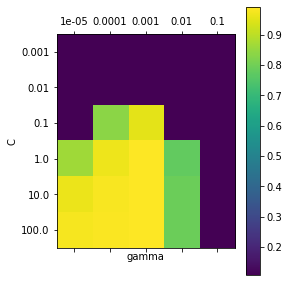

In [17]:
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

### Ejercicios

1. Usa `GridSearchCV` para ajustar `n_neighbors` de `KNeighborsClassifier`.

2. Compara la velocidad  y exactitud de `LogisticRegression`, `LinearSVC` y `SGDClassifier` en el conjunto de datos `bank campaign` y `adult`. Prueba con `LogisticRegression(solver='sag')`

In [18]:
## Tus soluciones

Mejores parametros: {'n_neighbors': 1}
Exactitud del conjunto de entrenamiento: 1.0
Exactitud del conjunto de pruebas: 0.9888888888888889


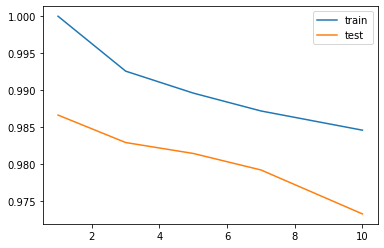

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

param_grid = {'n_neighbors': [1, 3, 5, 7, 10]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                    return_train_score=True)
grid.fit(X_train, y_train)

print("Mejores parametros: %s" % grid.best_params_)
print("Exactitud del conjunto de entrenamiento: %s" % grid.score(X_train, y_train))
print("Exactitud del conjunto de pruebas: %s" % grid.score(X_test, y_test))
results = grid.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_train_score'], label="train")
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], label="test")
plt.legend()